POPULAR DESTINATIONS:
---

What are the most popular destinations for travelers?

In [51]:
# Dependencies
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
import holoviews as hv
hv.extension('bokeh')
# Import API key
from api_keys import geoapify_key

In [52]:
# Reference the file where the CSV is located
tourism_csv = Path("Resources/tourism_dataset.csv")

# Import the date into a Pandas DataFrame
tourism_df = pd.read_csv(tourism_csv)
print(tourism_df.head())

     Location Country    Category  Visitors  Rating    Revenue  \
0  kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1  aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2  dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3  DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4  WJCCQlepnz  France    Cultural    124867    1.43  547893.24   

  Accommodation_Available  
0                     Yes  
1                      No  
2                     Yes  
3                     Yes  
4                      No  


In [53]:
#Check DataFrame info
tourism_df.info

<bound method DataFrame.info of         Location Country    Category  Visitors  Rating    Revenue  \
0     kuBZRkVsAR   India      Nature    948853    1.32   84388.38   
1     aHKUXhjzTo     USA  Historical    813627    2.01  802625.60   
2     dlrdYtJFTA  Brazil      Nature    508673    1.42  338777.11   
3     DxmlzdGkHK  Brazil  Historical    623329    1.09  295183.60   
4     WJCCQlepnz  France    Cultural    124867    1.43  547893.24   
...          ...     ...         ...       ...     ...        ...   
5984  xAzwnVKAqz     USA       Urban    828137    1.97  132848.78   
5985  IfKotyaJFC  France      Nature    276317    3.53  325183.96   
5986  bPyubCWGgA   Egypt       Beach    809198    3.37  927336.50   
5987  kkWIucpBnu   Egypt    Cultural    808303    2.52  115791.43   
5988  gHXUrdticm  France    Cultural     40939    4.65  957026.85   

     Accommodation_Available  
0                        Yes  
1                         No  
2                        Yes  
3              

Data cleaning
---

In [54]:
# Look for missing values
tourism_df.count()

Location                   5989
Country                    5989
Category                   5989
Visitors                   5989
Rating                     5989
Revenue                    5989
Accommodation_Available    5989
dtype: int64

In [55]:
# Drop null rows
no_null_tourism_df = tourism_df.dropna(how='any')
no_null_tourism_df.count()

Location                   5989
Country                    5989
Category                   5989
Visitors                   5989
Rating                     5989
Revenue                    5989
Accommodation_Available    5989
dtype: int64

In [56]:
# Drop some unnecessary columns
tourism_reduce_columns_df = no_null_tourism_df[["Location", "Country", "Category", "Visitors", "Rating", "Revenue"]]
tourism_reduce_columns_df.head()

,Location,Country,Category,Visitors,Rating,Revenue
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24


In [57]:
# Calculate the average spending of each visitor
tourism_reduce_columns_df["Visitor_average_spending"] = tourism_reduce_columns_df["Revenue"] / tourism_reduce_columns_df["Visitors"]
tourism_reduce_columns_df

,Location,Country,Category,Visitors,Rating,Revenue,Visitor_average_spending
0,kuBZRkVsAR,India,Nature,948853,1.32,84388.38,0.088937
1,aHKUXhjzTo,USA,Historical,813627,2.01,802625.60,0.986479
2,dlrdYtJFTA,Brazil,Nature,508673,1.42,338777.11,0.666002
3,DxmlzdGkHK,Brazil,Historical,623329,1.09,295183.60,0.473560
4,WJCCQlepnz,France,Cultural,124867,1.43,547893.24,4.387815
...,...,...,...,...,...,...,...
5984,xAzwnVKAqz,USA,Urban,828137,1.97,132848.78,0.160419
5985,IfKotyaJFC,France,Nature,276317,3.53,325183.96,1.176851
5986,bPyubCWGgA,Egypt,Beach,809198,3.37,927336.50,1.145995
5987,kkWIucpBnu,Egypt,Cultural,808303,2.52,115791.43,0.143253


In [58]:
# List unique values of "Country" in alphabetical order to locate any that may be the same
sorted(tourism_reduce_columns_df["Country"].unique())

['Australia', 'Brazil', 'China', 'Egypt', 'France', 'India', 'USA']

In [59]:
country_summary = tourism_reduce_columns_df.groupby("Country")[["Visitors", "Revenue", "Visitor_average_spending"]].sum().reset_index()
country_summary.iloc[6,0] = "United States of America"
country_summary

,Country,Visitors,Revenue,Visitor_average_spending
0,Australia,416038005,4.126633e+08,3237.116104
1,Brazil,414293518,4.267832e+08,3684.930425
2,China,404448372,3.984324e+08,3905.323784
3,Egypt,458573652,4.605948e+08,3019.940355
4,France,424944621,4.105266e+08,2176.351000
5,India,451083005,4.546763e+08,2590.928737
6,United States of America,431204187,4.277053e+08,3091.313189


In [60]:
# Import the date into a Pandas DataFrame
country_geographic_df = pd.read_csv("Resources/longitude-latitude.csv")
print(country_geographic_df.head())

         Country ISO-ALPHA-3 ISO-ALPHA-2  IOC FIFA   Latitude  Longitude  \
0          Aruba         ABW          AW  ARU  ARU  12.521110 -69.968338   
1    Afghanistan         AFG          AF  AFG  AFG  33.939110  67.709953   
2         Angola         AGO          AO  ANG  ANG -11.202692  17.873887   
3       Anguilla         AIA          AI  NaN  AIA  18.220554 -63.068615   
4  Åland Islands         ALA         NaN  NaN  NaN  60.250716  20.374146   

   ISO-Name  Historical WikiData_ID  WikiData_Latitude  WikiData_Longitude  \
0         1           0      Q21203              12.51              -69.97   
1         1           0        Q889              33.00               66.00   
2         1           0        Q916             -12.35               17.35   
3         1           0      Q25228              18.23              -63.05   
4         1           0       Q5689              60.25               20.00   

  WikiData_Label                               WikiData_Description  
0   

In [61]:
# Merge tourism Dataframe and country georgraphic
tourism_with_long_lat = pd.merge(country_summary,country_geographic_df, on="Country", how="inner")
tourism_with_long_lat

,Country,Visitors,Revenue,Visitor_average_spending,ISO-ALPHA-3,ISO-ALPHA-2,IOC,FIFA,Latitude,Longitude,ISO-Name,Historical,WikiData_ID,WikiData_Latitude,WikiData_Longitude,WikiData_Label,WikiData_Description
0,Australia,416038005,4.126633e+08,3237.116104,AUS,AU,AUS,AUS,-25.274398,133.775136,1,0,Q408,-28.00,137.00,Australia,country in Oceania
1,Brazil,414293518,4.267832e+08,3684.930425,BRA,BR,BRA,BRA,-14.235004,-51.925280,1,0,Q155,-14.00,-53.00,Brazil,country in South America
2,China,404448372,3.984324e+08,3905.323784,CHN,CN,CHN,CHN,35.861660,104.195397,1,0,Q148,35.84,103.45,People's Republic of China,state in East Asia
3,Egypt,458573652,4.605948e+08,3019.940355,EGY,EG,EGY,EGY,26.820553,30.802498,1,0,Q79,27.00,29.00,Egypt,sovereign state in North Africa and Asia
4,France,424944621,4.105266e+08,2176.351000,FRA,FR,FRA,FRA,46.227638,2.213749,1,0,Q142,47.00,2.00,France,country in Western Europe
5,India,451083005,4.546763e+08,2590.928737,IND,IN,IND,IND,20.593684,78.962880,1,0,Q668,22.80,83.00,India,country in South Asia
6,United States of America,431204187,4.277053e+08,3091.313189,USA,US,USA,USA,37.090240,-95.712891,1,0,Q30,39.83,-98.58,United States of America,sovereign state in North America


In [62]:
# Rename column names
tourism_with_long_lat_selected_columns = tourism_with_long_lat[["Country", "Visitors", "Revenue", "Visitor_average_spending", "ISO-ALPHA-3", "Latitude", "Longitude"]]
tourism_with_long_lat_selected_columns = tourism_with_long_lat_selected_columns.rename(columns={"ISO-ALPHA-3": "Country_code"})
tourism_with_long_lat_selected_columns

,Country,Visitors,Revenue,Visitor_average_spending,Country_code,Latitude,Longitude
0,Australia,416038005,4.126633e+08,3237.116104,AUS,-25.274398,133.775136
1,Brazil,414293518,4.267832e+08,3684.930425,BRA,-14.235004,-51.925280
2,China,404448372,3.984324e+08,3905.323784,CHN,35.861660,104.195397
3,Egypt,458573652,4.605948e+08,3019.940355,EGY,26.820553,30.802498
4,France,424944621,4.105266e+08,2176.351000,FRA,46.227638,2.213749
5,India,451083005,4.546763e+08,2590.928737,IND,20.593684,78.962880
6,United States of America,431204187,4.277053e+08,3091.313189,USA,37.090240,-95.712891


Statistical Analysis
---

In [63]:
# Sort the country by number of visitors
country_visitors_order = tourism_with_long_lat_selected_columns.sort_values(by="Visitors", ascending=False)

# Rename USA to United States of America for mapping with geo data
country_visitors_order.iloc[2,0] = "United States of America"
country_visitors_order

,Country,Visitors,Revenue,Visitor_average_spending,Country_code,Latitude,Longitude
3,Egypt,458573652,4.605948e+08,3019.940355,EGY,26.820553,30.802498
5,India,451083005,4.546763e+08,2590.928737,IND,20.593684,78.962880
6,United States of America,431204187,4.277053e+08,3091.313189,USA,37.090240,-95.712891
4,France,424944621,4.105266e+08,2176.351000,FRA,46.227638,2.213749
0,Australia,416038005,4.126633e+08,3237.116104,AUS,-25.274398,133.775136
1,Brazil,414293518,4.267832e+08,3684.930425,BRA,-14.235004,-51.925280
2,China,404448372,3.984324e+08,3905.323784,CHN,35.861660,104.195397


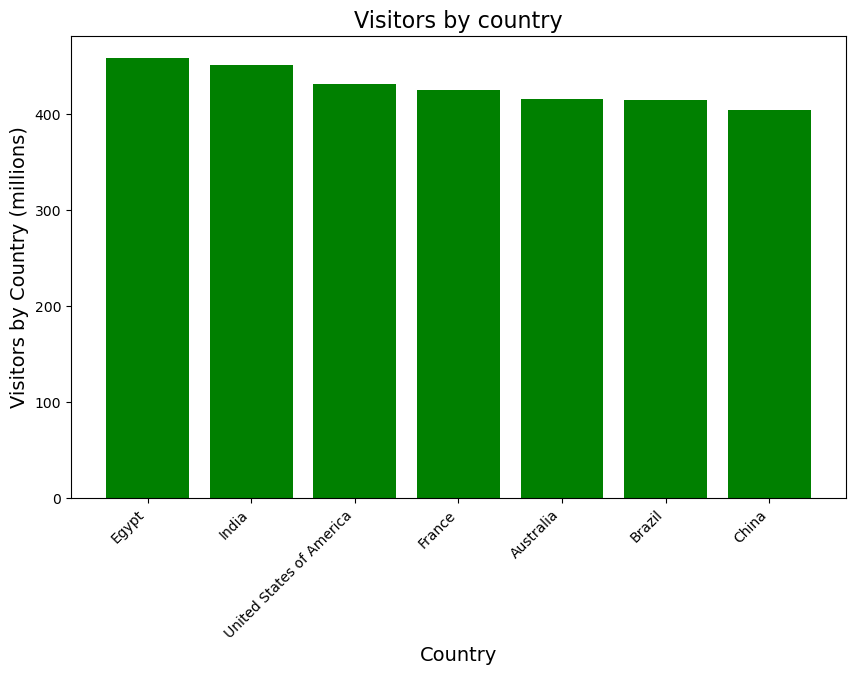

In [69]:
# Plot Visitors by country
plt.figure(figsize=(10,6))
country_visitors_plot = plt.bar(country_visitors_order["Country"], country_visitors_order["Visitors"] / 1000000, color="green")
plt.title(f"Visitors by country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Visitors by Country (millions)", fontsize=14)
plt.yticks(np.arange(0, max(country_visitors_order["Visitors"]) / 1000000 + 1, 100))
plt.xticks(rotation=45, ha='right')
# Save the figure
plt.savefig("output_data/Visitors_by_country.png")
plt.show()

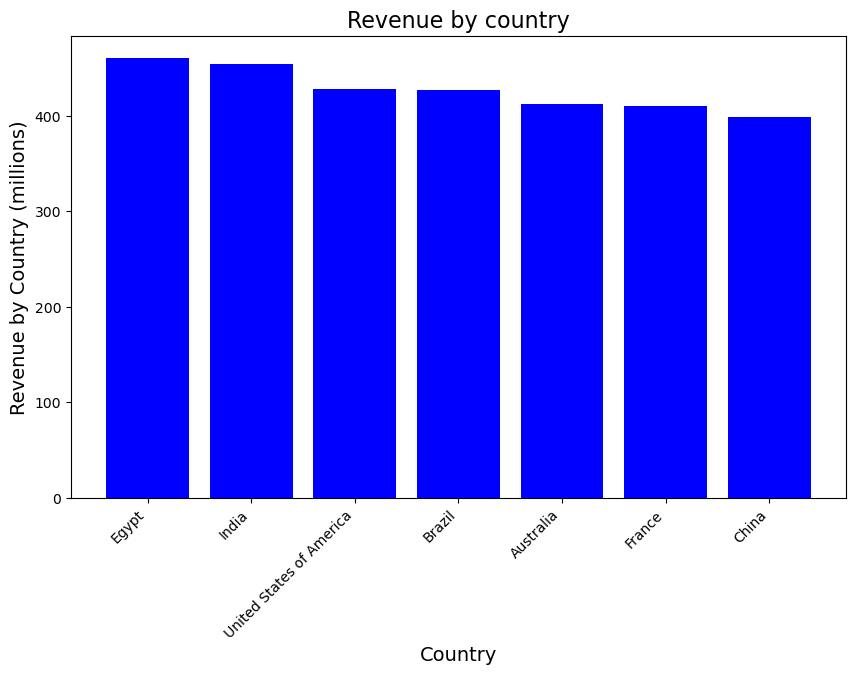

In [70]:
# Sort the country by revenue
country_revenue_order = tourism_with_long_lat_selected_columns.sort_values(by="Revenue", ascending=False)

# Plot Revenue by Country
plt.figure(figsize=(10,6))
country_revenue_plot = plt.bar(country_revenue_order["Country"], country_revenue_order["Revenue"] / 1000000, color="blue")
plt.title(f"Revenue by country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Revenue by Country (millions)", fontsize=14)
plt.yticks(np.arange(0, max(country_revenue_order["Revenue"]) / 1000000 + 1, 100))
#plt.xticks(rotation=45, ha='right')
# Save the figure
plt.savefig("output_data/Revenue_by_country.png")
plt.show()

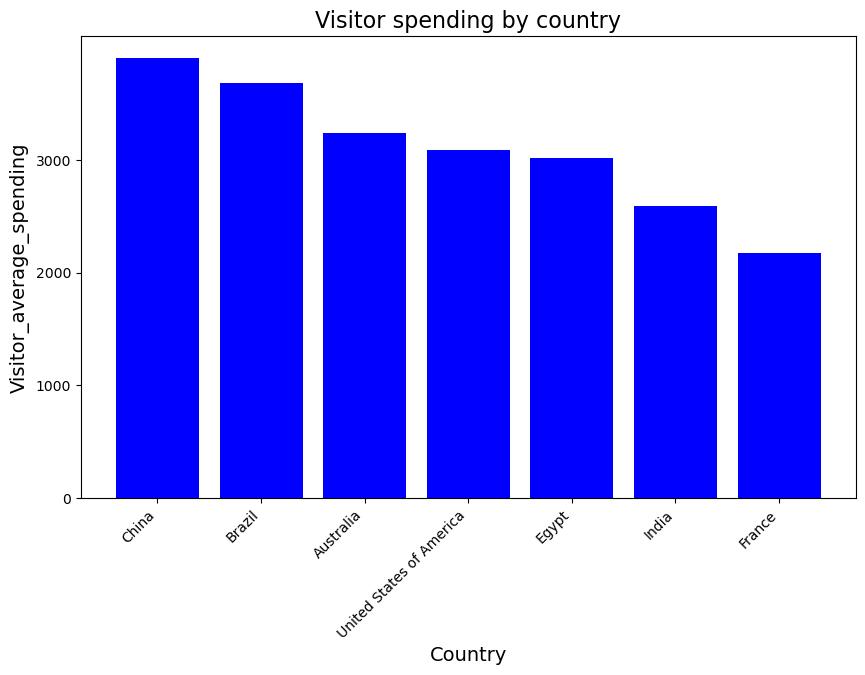

In [73]:
# Sort the country by revenue
country_revenue_order = tourism_with_long_lat_selected_columns.sort_values(by="Visitor_average_spending", ascending=False)

# Plot Revenue by Country
plt.figure(figsize=(10,6))
country_revenue_plot = plt.bar(country_revenue_order["Country"], country_revenue_order["Visitor_average_spending"], color="blue")
plt.title(f"Visitor spending by country", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Visitor_average_spending", fontsize=14)
plt.yticks(np.arange(0, max(country_revenue_order["Visitor_average_spending"]) + 10, 1000))
plt.xticks(rotation=45, ha='right')
# Save the figure
plt.savefig("output_data/Spending_by_country.png")
plt.show()

In [190]:
tourism_with_long_lat_selected_columns["Visitors (million)"] = tourism_with_long_lat_selected_columns["Visitors"] / 1000000
tourism_with_long_lat_selected_columns

,Country,Visitors,Revenue,Visitor_average_spending,Country_code,Latitude,Longitude,Visitors (million)
0,Egypt,458573652,4.605948e+08,3019.940355,EGY,26.820553,30.802498,458.573652
1,India,451083005,4.546763e+08,2590.928737,IND,20.593684,78.962880,451.083005
2,United States of America,431204187,4.277053e+08,3091.313189,USA,37.090240,-95.712891,431.204187
3,France,424944621,4.105266e+08,2176.351000,FRA,46.227638,2.213749,424.944621
4,Australia,416038005,4.126633e+08,3237.116104,AUS,-25.274398,133.775136,416.038005
5,Brazil,414293518,4.267832e+08,3684.930425,BRA,-14.235004,-51.925280,414.293518
6,China,404448372,3.984324e+08,3905.323784,CHN,35.861660,104.195397,404.448372


In [202]:
# Configure the map plot
map_plot_country = tourism_with_long_lat_selected_columns.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "OSM",
    frame_width = 700,
    frame_height = 500,
    size = "Visitors (million)",
    color = "Country",
    hover_cols=['Longitude','Latitude','Country','Visitors (million)','Revenue','Visitor_average_spending']
)
# Save the figure
plt.savefig("output_data/Visitors_by_country_pie.png")
# Display the map
map_plot_country

:Overlay
   .WMTS.I   :WMTS   [Longitude,Latitude]
   .Points.I :Points   [Longitude,Latitude]   (Country,Visitors (million),Revenue,Visitor_average_spending)

<Figure size 640x480 with 0 Axes>

Visitor_order: Egypt - India - United States of America - France - Autralia - Brazil - China
Revenue_order: Egypt - India - United States of America - Brazil - Autralia - France - China
Visitor_spending: China - Brazil - Australia - United States of America -Egypt - India - France

In [185]:
# top destinations by type
tourism_group_category_df = no_null_tourism_df.groupby("Category")[["Visitors", "Revenue", "Visitor_average_spending"]].sum().reset_index()
# Sort destinations by type
tourism_category_order_df = tourism_group_category_df.sort_values(by="Visitors", ascending=False)
tourism_category_order_df

,Category,Visitors,Revenue,Visitor_average_spending
0,Adventure,528962493,5.021662e+08,3469.823555
5,Urban,515372368,5.119633e+08,3777.120032
3,Historical,495958186,4.846126e+08,3558.714099
2,Cultural,495834336,5.181320e+08,3242.606242
1,Beach,495111800,4.972478e+08,3163.950226
4,Nature,469346177,4.772601e+08,4493.689440


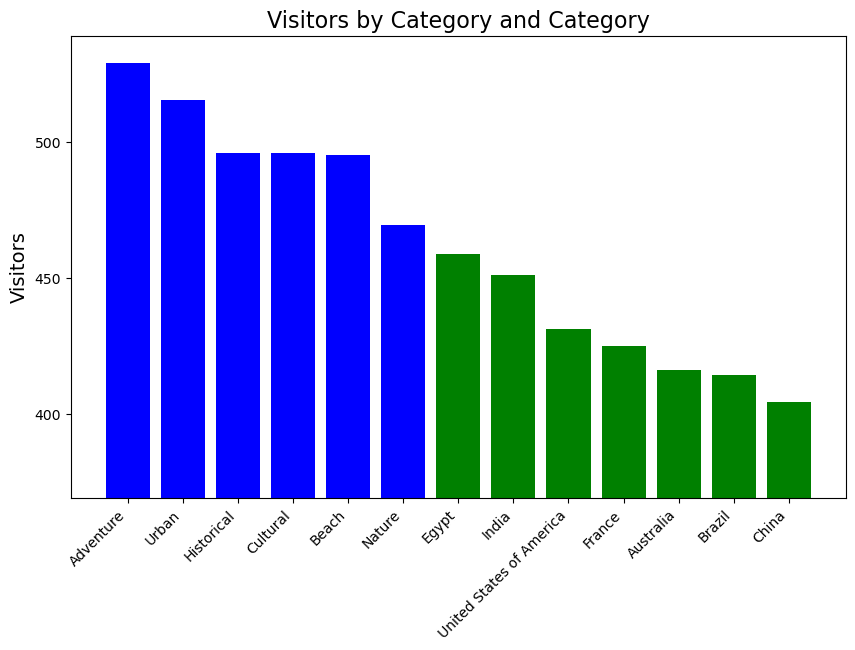

In [186]:
# Plot Visitors by Catergory
plt.figure(figsize=(10,6))
category_visitors_plot = plt.bar(tourism_category_order_df["Category"], tourism_category_order_df["Visitors"] / 1000000, color="blue")
country_visitors_plot = plt.bar(country_visitors_order["Country"], country_visitors_order["Visitors"] / 1000000, color="green")
plt.title(f"Visitors by Category and Category", fontsize=16)
#plt.xlabel("Category", fontsize=14)
plt.ylabel("Visitors", fontsize=14)
plt.yticks(np.arange(0, max(country_visitors_order["Visitors"]) / 1000000 + 50, 50))
plt.xticks(rotation=45, ha='right')
# Set x and y limits
plt.ylim(min(tourism_group_category_df["Visitors"]) / 1000000 - 100, max(tourism_group_category_df["Visitors"]) / 1000000 + 10)
# Save the figure
plt.savefig("output_data/Visitors_by_country_category.png")
plt.show()

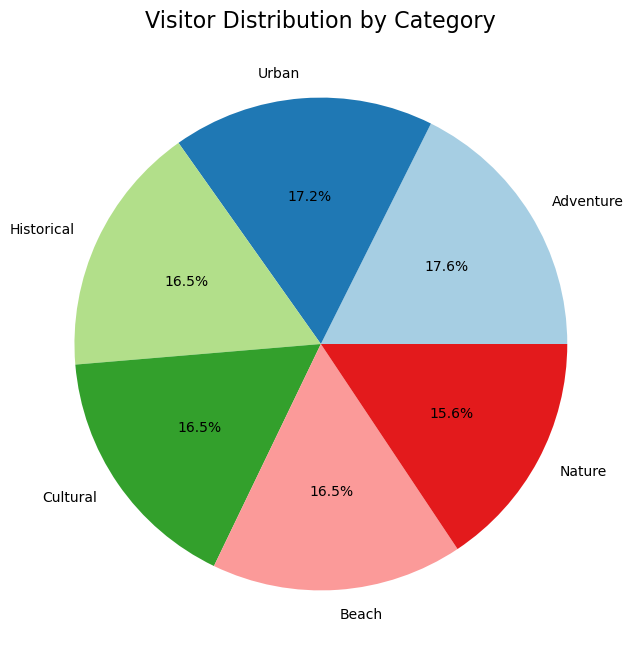

In [187]:
# Pie chart showing the distribution of visitors by category
plt.figure(figsize=(8,8))
plt.pie(tourism_category_order_df['Visitors'], labels=tourism_category_order_df['Category'], autopct='%1.1f%%', colors=plt.cm.Paired.colors)

# Adding title
plt.title('Visitor Distribution by Category', fontsize=16)
# Save the figure
plt.savefig("output_data/Visitors_by_category_pie.png")
# Display the plot
plt.show()

In [188]:
# top 10 locations
tourism_group_location_df = no_null_tourism_df.groupby("Location")[["Country", "Visitors", "Revenue", "Visitor_average_spending"]].sum().reset_index()
tourism_group_location_sorted = tourism_group_location_df.sort_values(by="Visitors", ascending=False)
tourism_group_location_sorted.head(10)


,Location,Country,Visitors,Revenue,Visitor_average_spending
2781,YWZBWoBIzj,China,999982,656615.31,0.656627
5055,rrZdbgEIqB,Egypt,999891,462329.96,0.462380
3726,gcDnKZwQvb,France,999855,157466.43,0.157489
1684,ObvfATdWXD,Australia,999750,184504.30,0.184550
1051,JHduvACsJw,Australia,999664,966022.60,0.966347
3644,fpDjltebSp,USA,999197,843224.00,0.843902
4770,pXxOxFnLVA,Australia,998976,509279.84,0.509802
5490,vnyObMcbQY,USA,998356,53965.42,0.054054
5881,zIlbARMNtv,Brazil,998327,203004.77,0.203345
886,HnUcRjnqcx,India,997922,608390.07,0.609657


Finding
---

In [ ]:
# Finding Destinations (Country)
Visitor_order: Egypt - India - United States of America - France - Autralia - Brazil - China
Revenue_order: Egypt - India - United States of America - Brazil - Autralia - France - China
Visitor_spending: China - Brazil - Australia - United States of America -Egypt - India - France
# Finding Destinations (Category)